# 1. Load dataset

#### In this assignment, you will use a turbo.az dataset which is a collection of cars (Mercedes C-class). It contains information about 1328 cars with features of (Sheher, Marka, Model, Buraxilish ili, Ban novu, Reng, Muherrikin hecmi, Muherrikin gucu, Yanacaq novu, Yurush, Suretler qutusu, Oturucu, Yeni, Qiymet, Extra Information, Seller’s comment). You will need to read the data from data file (turboaz.csv) and extract only 3 columns for your model:
X1 - Yurush (mileage)<br>
X2 - Buraxilish ili (model year)<br>
Y - Qiymet (price)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df = pd.read_csv("turboaz.csv")
df.head()

,Sheher,Marka,Model,Buraxilish ili,Ban novu,Reng,Muherrikin hecmi,Muherrikin gucu,Yanacaq novu,Yurush,Suretler qutusu,Oturucu,Yeni,Qiymet,Extra Info,Seller comment
0,Sumqayıt,Mercedes,C 200,1999,Sedan,Qara,2.0 L,175 a.g.,Benzin,366 000 km,Avtomat,Arxa,Xeyr,12500 AZN,Kreditdədir,Barter mümkündür
1,Bakı,Mercedes,C 180,2014,Sedan,Qara,1.6 L,167 a.g.,Benzin,102 000 km,Avtomat,Arxa,Xeyr,31500 $,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."
2,Sumqayıt,Mercedes,C 240,2002,Sedan,Qara,2.6 L,177 a.g.,Benzin,469 700 km,Avtomat,Arxa,Xeyr,11700 AZN,Kreditdədir,Barter mümkündür
3,Şirvan,Mercedes,C 180,1998,Sedan,Göy,1.8 L,125 a.g.,Benzin,556 680 km,Avtomat,Arxa,Xeyr,9700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Mawin BAKIDADI. Tecili satilir yaxwi veziyetde...
4,Sumqayıt,Mercedes,C 220,2000,Sedan,Gümüşü,2.2 L,150 a.g.,Dizel,300 000 km,Avtomat,Arxa,Xeyr,12700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Vurugu udari deyisen detali curuyu qetiyyen yo...


In [3]:
df['Yurush'] = df['Yurush'].str.replace(" ", "").str[:-2]
df['Yurush'] = pd.to_numeric(df['Yurush'])
df['Qiymet'] = pd.to_numeric(df['Qiymet'].str.split(" ").str[0])

x1_saved = df['Yurush']
x2_saved = df['Buraxilish ili']
y_saved = df['Qiymet']


In [4]:
df['Yurush']

0       366000
1       102000
2       469700
3       556680
4       300000
         ...  
1323    325000
1324    280000
1325    272000
1326    207000
1327    255700
Name: Yurush, Length: 1328, dtype: int64

In [5]:
df = df[["Yurush", "Buraxilish ili", "Qiymet"]]
df.head()

,Yurush,Buraxilish ili,Qiymet
0,366000,1999,12500
1,102000,2014,31500
2,469700,2002,11700
3,556680,1998,9700
4,300000,2000,12700


# 2. Visualize

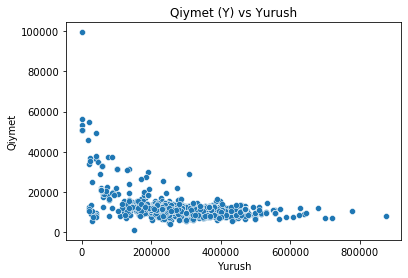

In [6]:
ax = sns.scatterplot(x='Yurush', y='Qiymet', data=df);
ax.set_title("Qiymet (Y) vs Yurush")
ax.set_xlabel("Yurush");
ax.set_ylabel("Qiymet");

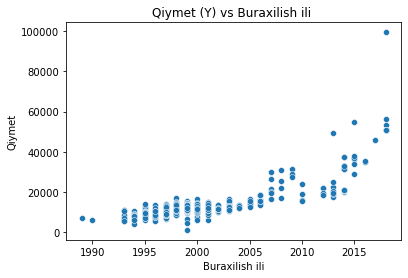

In [7]:
ax = sns.scatterplot(x="Buraxilish ili", y="Qiymet", data=df);
ax.set_title("Qiymet (Y) vs Buraxilish ili ")
ax.set_xlabel("Buraxilish ili");
ax.set_ylabel("Qiymet");

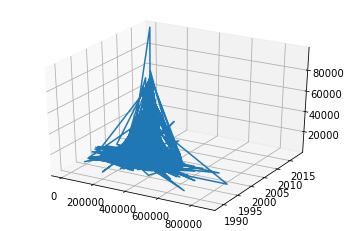

In [8]:
x1 = df['Yurush'].values
x2 = df['Buraxilish ili'].values
y = df['Qiymet'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1,x2,y)

plt.show()

# 3. Linear Regresa a mi

##### Implement Linear Regression from scratch (using numpy)
a) Calculate cost function. Implement a function which returns cost given true y values, x values and parameters (w).<br>
<div>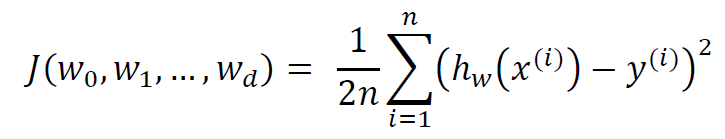</div>

In [9]:
linear = lambda X, w: X.dot(w)
cost_function = lambda loss: np.sum(loss ** 2)/(2 * len(y))

In [10]:
x0 = np.ones(len(x1))
X = np.array([x0, x1, x2]).T
w = np.array([0, 3, 1], np.float64)  

initial_cost = cost_function(linear(X, w) - y)
initial_cost

409619257182.8155

b) Normalize data using Z score normalization.<br>

In [11]:
x1 = (x1 - x1.mean())/x1.std()
x2 = (x2 - x2.mean())/x2.std()
y = (y - y.mean())/y.std()
X = np.array([x0, x1, x2]).T

c) Implement gradient descent algorithm to minimize the cost function.
- Assign initial values of W=(w0, w1, w2) to zero or choose randomly
- Learning rate: alpha=0.001, you can change it in different experiments
- Number of iterations: 10000 or you can stop it when two sequential values are too close.
- Calculate values of parameters using gradient descent formula.
<div>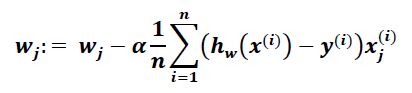</div>

In [12]:
def gradient_descent(X, y, w, learning_rate, iterations):
    cost_log = []
    
    for iteration in range(iterations):
        
        h = X.dot(w)
        loss = h - y
        gradient = X.T.dot(loss) / len(y)
        w -= learning_rate * gradient
        cost = cost_function(loss)
        cost_log.append(cost)
        
        if (iteration % 1000 == 0) or (iteration == iterations - 1): 
            print(f"Iteration {iteration} | Cost {round(cost, 2)}")

    return w, cost_log

In [13]:
learning_rate = 0.001
iterations = 10000
new_weights, cost_log = gradient_descent(X, y, w, learning_rate, iterations)

Iteration 0 | Cost 4.59
Iteration 1000 | Cost 0.75
Iteration 2000 | Cost 0.33
Iteration 3000 | Cost 0.21
Iteration 4000 | Cost 0.16
Iteration 5000 | Cost 0.14
Iteration 6000 | Cost 0.13
Iteration 7000 | Cost 0.12
Iteration 8000 | Cost 0.12
Iteration 9000 | Cost 0.12
Iteration 9999 | Cost 0.12


In [14]:
new_weights

array([ 1.75667661e-14, -6.65250258e-02,  8.40541113e-01])

d) Plot graph of Cost function and describe how it changes over iterations.

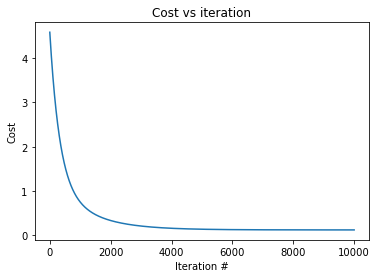

In [15]:
plt.plot(cost_log)
plt.xlabel('Iteration #')
plt.ylabel('Cost')
plt.title('Cost vs iteration')
plt.show()

e) Plot points of Y (Qiymet) vs X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

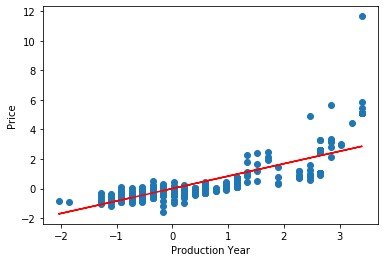

In [16]:
plt.scatter(x2, y)
plt.xlabel('Production Year')
plt.ylabel('Price')
predictions_year = new_weights[0] * x0 + new_weights[2] * x2
plt.plot(x2, predictions_year, c='r')
plt.show()

f) Plot points of Y (Qiymet) vs X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent.

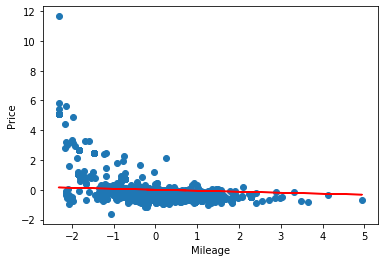

In [17]:
plt.scatter(x1, y)
plt.xlabel('Mileage')
plt.ylabel('Price')

predictions_mileage = new_weights[0] * x0 + new_weights[1] * x1 
plt.plot(x1, predictions_mileage, c='r')
plt.show()

g) Plot 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

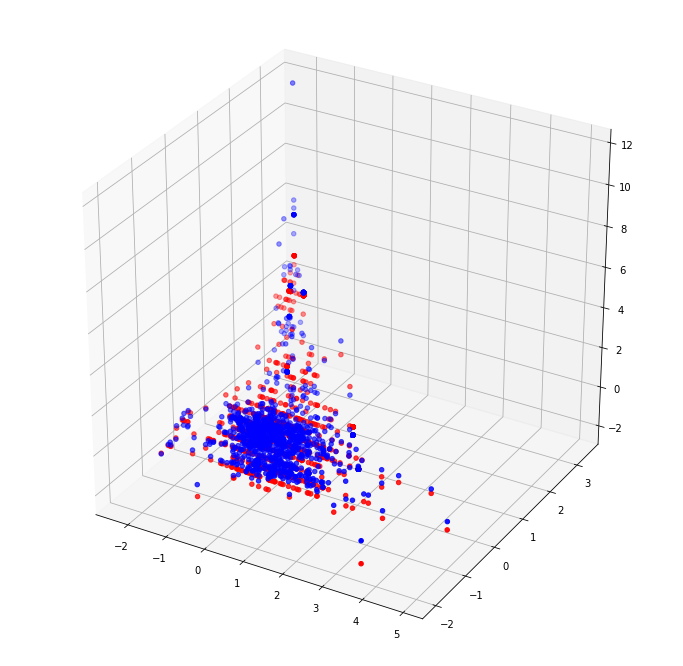

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, color='b')
predictions_3d = new_weights[0] * x0 + new_weights[1] * x1 + new_weights[2] * x2
ax.scatter(x1, x2, predictions_3d, c='r')

plt.show()

h) Given are two new cars which are not in the dataset. Predict the prices of these cars by using your parameters and compare your predictions with the actual prices.
- Car 1 {Yurush: 240000, Buraxilish ili: 2000, Qiymet: 11500}
- Car 2 {Yurush: 415558, Buraxilish ili: 1996, Qiymet: 8800}

In [19]:
def predict(X):
    x1, x2 = X
    x1 = (x1 - x1_saved.mean())/x1_saved.std()
    x2 = (x2 - x2_saved.mean())/x2_saved.std()
    prediction = new_weights[0] * 1 + new_weights[1] * x1 + new_weights[2] * x2
    return prediction * y_saved.std() + y_saved.mean()

In [20]:
X_test = [[240000, 2000], [415558, 1996]]
y_test = [11500, 8800]

print(f"Car #1: Prediction: {round(predict(X_test[0]), 2)} | Actual: 11500")
print(f"Car #2: Prediction: {round(predict(X_test[1]), 2)} | Actual: 8800")

Car #1: Prediction: 13404.94 | Actual: 11500
Car #2: Prediction: 8002.04 | Actual: 8800


# 4. Linear Regression using library

#### Use a library to fit perform linear regression on the data. You should use the same features (Yurush and Buraxilish ili) as input to this model and perform the same testing (3(h)) as above (using scikit-learn library is recommended).

In [22]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X[:, 1:], y)

LinearRegression()

In [23]:
def predict_lr(X):
    x1, x2 = X
    x1 = (x1 - x1_saved.mean())/x1_saved.std()
    x2 = (x2 - x2_saved.mean())/x2_saved.std()
    prediction = regressor.predict(np.array([[x1, x2]]))
    return prediction[0] * y_saved.std() + y_saved.mean()

In [24]:
print('Coefficients: \n', regressor.coef_)
print(f"Car #1: Prediction: {round(predict_lr(X_test[0]), 2)} | Actual: 11500")
print(f"Car #2: Prediction: {round(predict_lr(X_test[1]), 2)} | Actual: 8800")

Coefficients: 
 [-0.08881689  0.81824968]
Car #1: Prediction: 13455.19 | Actual: 11500
Car #2: Prediction: 7935.6 | Actual: 8800
